In [6]:
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt


dataset = datasets.load_digits()

X = dataset['data']
y = dataset['target']
print(dataset['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [18]:
print(dataset.images.shape)
print(X.shape)

(1797, 8, 8)
(1797, 64)


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

cv = 10 # number of folds

# a single tree
dt_classifier = DecisionTreeClassifier()
(cross_val_score(dt_classifier, X, y, cv=cv)).mean()

0.8341558038485413

In [13]:
from sklearn.ensemble import BaggingClassifier

# ensemble
bagging = BaggingClassifier(dt_classifier, n_estimators=100)
(cross_val_score(bagging, X, y, cv=cv)).mean()

0.9231750465549349

In [19]:
d = X.shape[1]
n_features = int(d ** 0.5)
n_features

8

In [22]:
bagging = BaggingClassifier(dt_classifier, n_estimators=100, max_features=n_features)
(cross_val_score(bagging, X, y, cv=cv)).mean()

0.9254469273743015

In [23]:
# selection of random features when creating each vertex of a tree (bagging on randomized trees)

dt_classifier = DecisionTreeClassifier(max_features=n_features)
bagging = BaggingClassifier(dt_classifier, n_estimators=100)

(cross_val_score(bagging, X, y, cv=cv)).mean()

0.9521353196772191

In [31]:
# comparison with random forest

from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
bagging = BaggingClassifier(rf_classifier)

(cross_val_score(bagging, X, y, cv=cv)).mean()

0.9454531346989448

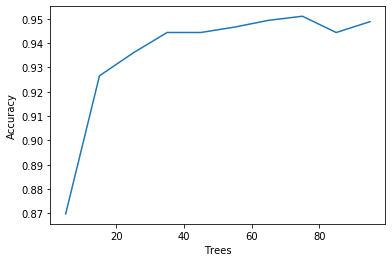

In [42]:
import numpy as np

# dependence on the number of trees

n_estimators = np.arange(5, 101, 10)
est_scores = []

for n in n_estimators:
    rf_classifier = RandomForestClassifier(n_estimators = n, max_features = n_features)
    est_scores.append(cross_val_score(rf_classifier, X, y, cv = cv).mean())
    
plt.plot(n_estimators, est_scores)
plt.xlabel('Trees')
plt.ylabel('Accuracy')
plt.show()

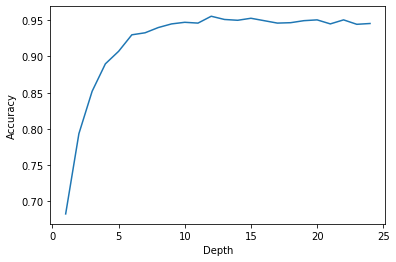

In [44]:
# dependence on the depth of trees

depths = np.arange(1, 25, 1)
depth_scores = []

for n in depths:
    rf_classifier = RandomForestClassifier(n_estimators = 100, max_features = n_features, max_depth = n)
    depth_scores.append(cross_val_score(rf_classifier, X, y, cv = 10).mean())
    
plt.plot(depths, depth_scores)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

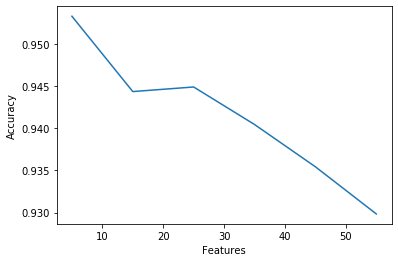

In [47]:
# dependence on the number of features

n_features = np.arange(5, d, 10)
# d = X.shape[1]
feat_scores = []

for n in n_features:
    rf_classifier = RandomForestClassifier(n_estimators = 100, max_features = n)
    feat_scores.append(cross_val_score(rf_classifier, X, y, cv = 10).mean())

plt.plot(n_features, feat_scores)
plt.xlabel('Features')
plt.ylabel('Accuracy')
plt.show()